In [29]:
# Importando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

In [21]:
# Carregar a base de dados

path = kagglehub.dataset_download("olcaybolat1/dermatology-dataset-classification")
os.environ['KAGLE_CONFIG_DIR'] = '/content'
print("Path to dataset files:", path)
os.listdir(path)

Path to dataset files: /root/.cache/kagglehub/datasets/olcaybolat1/dermatology-dataset-classification/versions/5


['dermatology_database_1.csv']

In [22]:
path = '/root/.cache/kagglehub/datasets/olcaybolat1/dermatology-dataset-classification/versions/5'
df = pd.read_csv(path + '/dermatology_database_1.csv')

**Feature Value Information**

In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient.

Every other feature clinical and histopathological was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.

## Propriedades dos dados:

In [23]:
# Verificando as linhas iniciais do dataset
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [24]:
# Verificando todas as colunas com os tipos de dados e a quantidade de conteúdos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [25]:
# Redundante, sabemos da linha anterior que não temos linha nula
df.isnull().sum()

,0
erythema,0
scaling,0
definite_borders,0
itching,0
koebner_phenomenon,0
polygonal_papules,0
follicular_papules,0
oral_mucosal_involvement,0
knee_and_elbow_involvement,0
scalp_involvement,0


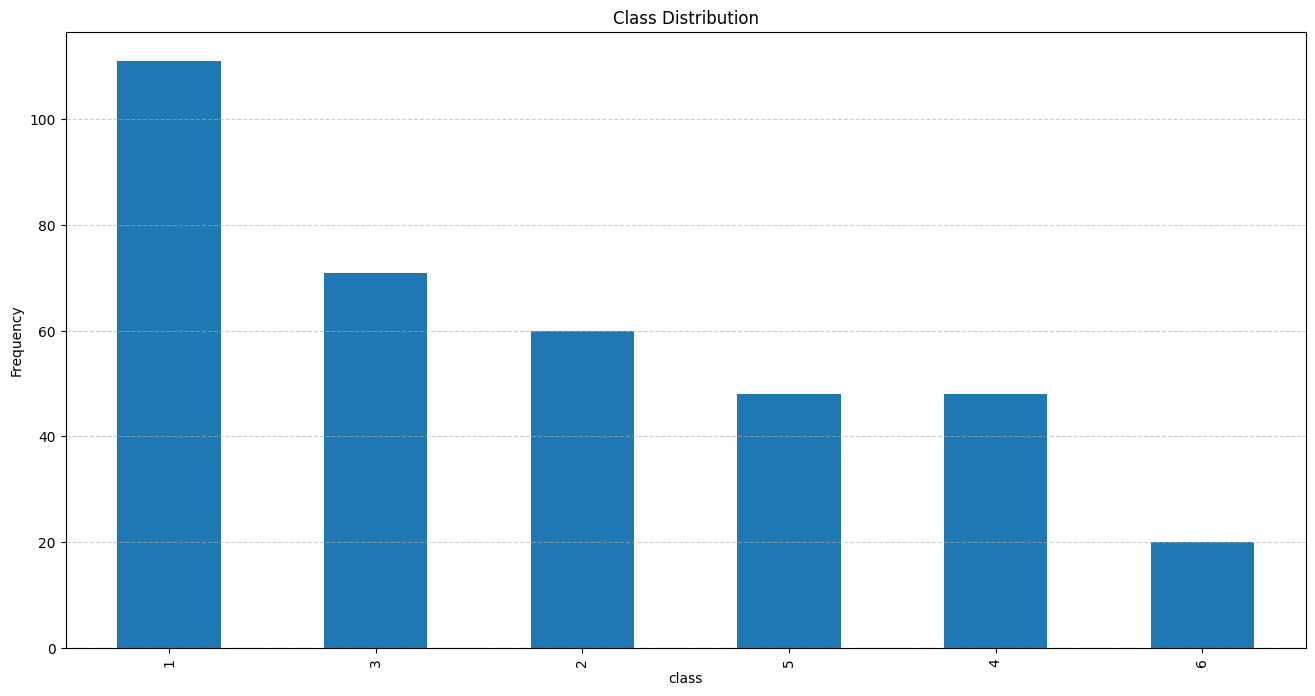

In [50]:
plt.figure(figsize=(16, 8))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
df['class'].value_counts().plot(kind='bar')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [51]:
contagem_classe = df['class'].value_counts().reset_index(name='Count')
contagem_classe.columns = ['class','Count']
contagem_classe

,class,Count
0,1,111
1,3,71
2,2,60
3,5,48
4,4,48
5,6,20


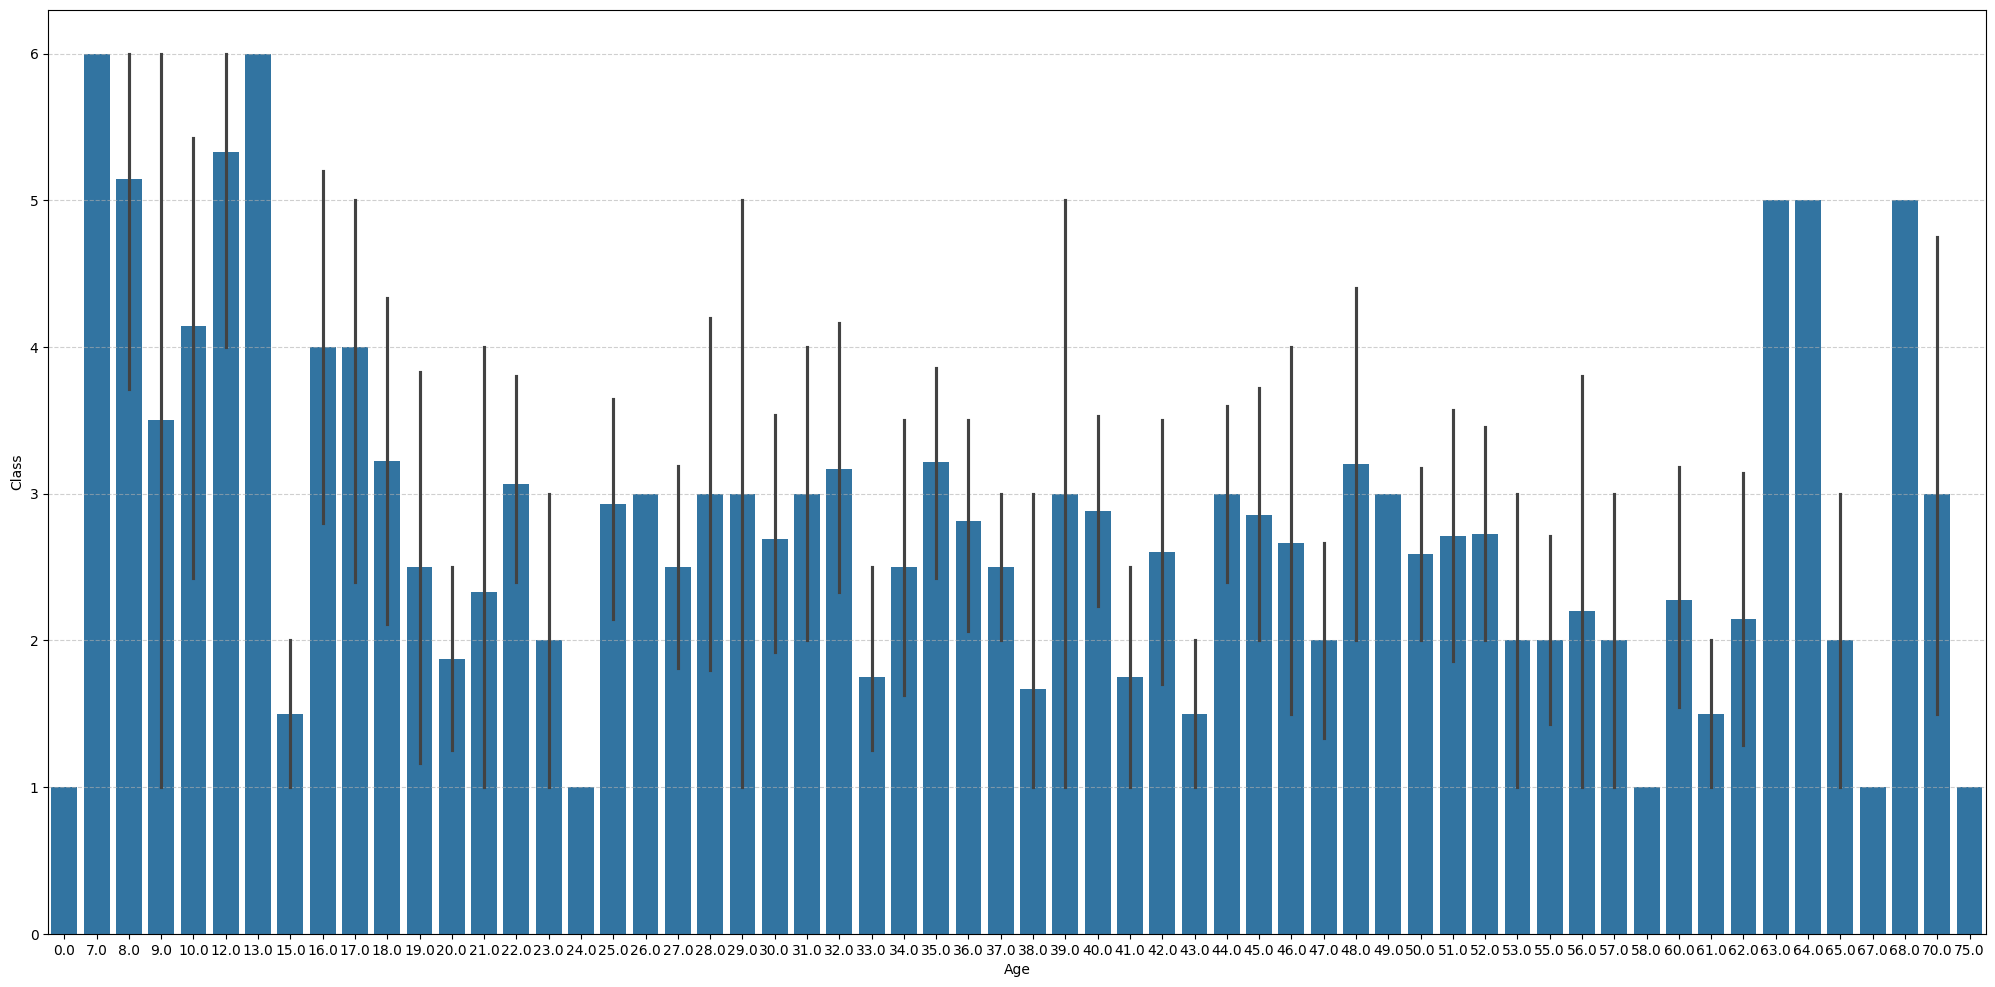

In [45]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df = df.dropna(subset=['age'])
df_ordenado = df.sort_values(by='age')

plt.figure(figsize=(25, 12))
sns.barplot(data=df_ordenado, x='age', y='class')
plt.xlabel('Age')
plt.ylabel('Class')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

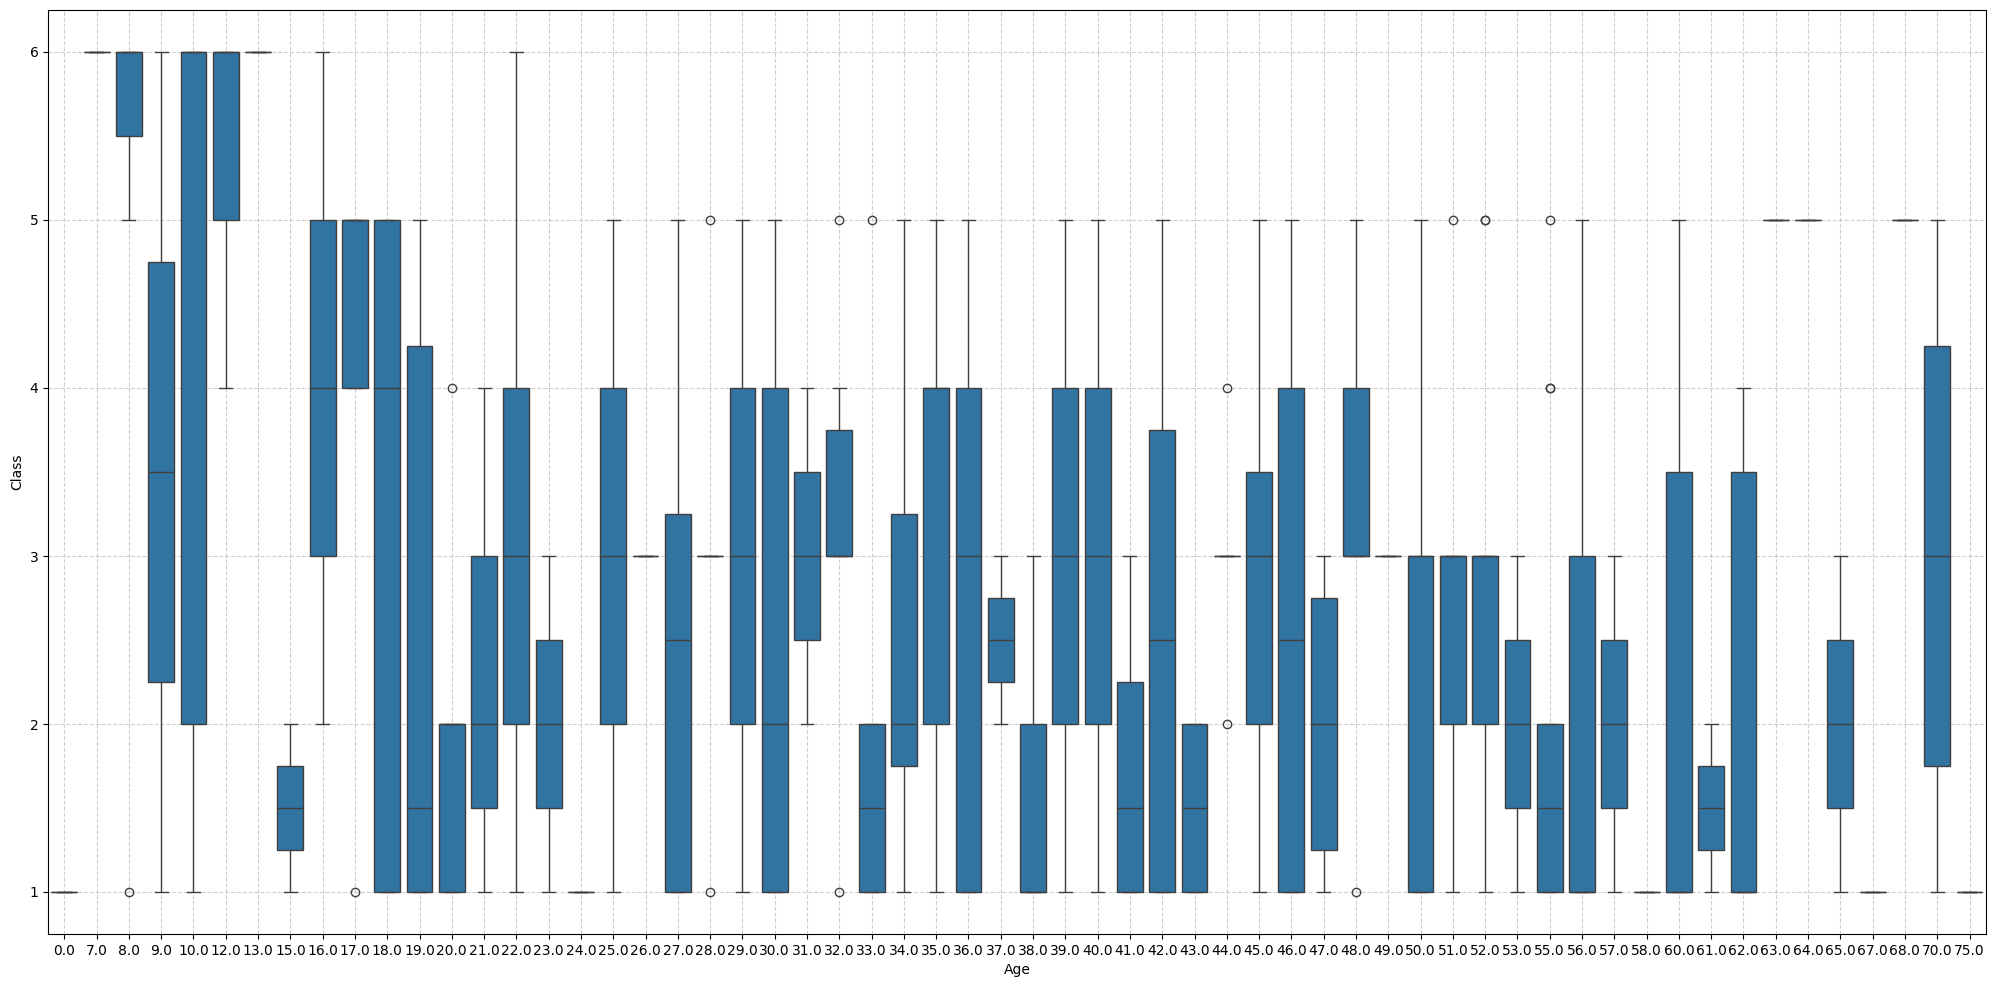

In [48]:
plt.figure(figsize=(25, 12))
sns.boxplot(data=df_ordenado, x='age', y='class')
plt.xlabel('Age')
plt.ylabel('Class')
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.show()

# ML:

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [72]:
X = df.drop('class',axis=1)
y = df['class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Regressão linear:

In [69]:
#Chamada do modelo

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Avaliando
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

MSE: 0.4519059939092453
R²: 0.8091035957932262


## Regressão Logistica:

In [73]:
# Foi preciso escalonar os dados por conta do solver usado pela biblioteca, não conseguiamos terminar os cálculos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Chamada do modelo

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Avaliando
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

MSE: 0.125
R²: 0.9471968709256845


## Árvore de decisão:

In [74]:
#Chamada do modelo

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Avaliando
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

MSE: 0.4722222222222222
R²: 0.8005215123859192


## Random Forest:

In [75]:
#Chamada do modelo

model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

#Avaliando
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
r2 = r2_score(y_test, y_pred)
print("R²:", r2)

MSE: 0.05555555555555555
R²: 0.9765319426336375
